In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest

#generating data
rng = np.random.RandomState(42)

#generate training data
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])

#generate new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

#generate outliers
X_outliers = rng.uniform(low=-1, high = 5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

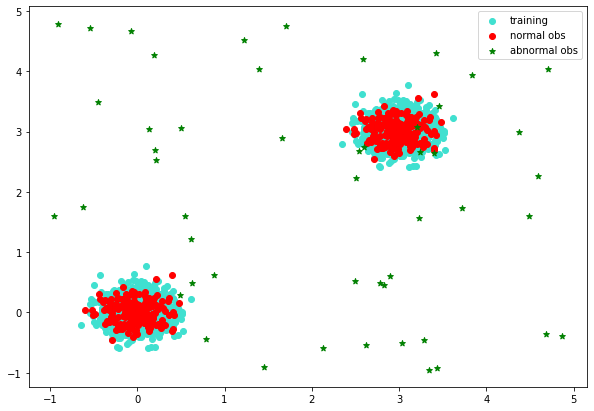

In [30]:
#plotting original dataset
fig = plt.figure(figsize=(10,7))

plt.scatter(X_train['x1'], X_train['x2'], label="training", color="turquoise")
plt.scatter(X_test['x1'], X_test['x2'], label="normal obs", color="red")
plt.scatter(X_outliers['x1'], X_outliers['x2'], label="abnormal obs", color="green", marker="*")

plt.legend()

In [81]:
#isolation forest

#training model
clf = IsolationForest(max_samples = 100, random_state=rng, contamination=0.1)
clf.fit(X_train)

#predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [88]:
#new, 'normal' observations
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])

#outliers
print("Accuracy:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

Accuracy: 0.9325
Accuracy: 0.98
